<a href="https://colab.research.google.com/github/Maram-Assili/heart-failure-prediction/blob/main/Projet_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**




L'analyse de survie est un ensemble de méthodes statistiques qui permet d'étudier le temps ecoulé avant qu'un évenement se produit

La simulation de données de survie est une pratique courante dans divers domaines de la recherche, en particulier en biostatistique, en épidémiologie et en recherche clinique. Elle permet de générer des ensembles de données représentatifs pour étudier le temps jusqu'à l'occurrence d'événements tels que la mortalité, la maladie, ou d'autres résultats d'intérêt.


Dans le cadre d'un essai clinique, nous allons simuler des données de survie pour évaluer l'efficacité et la sécurité d'un traitement médical. Les participants, âgés de 6 mois à 1 an, seront suivis jusqu'à l'âge de 3 ans. Le modèle se concentre sur le temps écoulé jusqu'au premier événement après le traitement. Les évaluations auront lieu tous les 6 mois jusqu'à l'âge de 3 ans. Les participants non événementiels seront censurés à droite, avec un temps de censure déterminé par la fin du suivi ou la dernière évaluation.

#1. Génération des âges d'entrée des participants

In [ ]:
import numpy as np
import pandas as pdµ
from scipy.stats import weibull_min
from scipy.optimize import minimize

num_participants = 1000
age_debut = 0.5
age_fin = 3.0
intervalles_suivi = [0.5, 1, 1.5, 2, 2.5, 3]

# Générer les âges d'entrée des participants uniformément répartis entre 6 mois et 1 an
ages_entree1 = np.random.uniform(age_debut, 1.0, size=num_participants)
ages_entree = np.round(ages_entree1, 2)
print(ages_entree.shape)
print(ages_entree[:5])

(1000,)
[0.57 0.7  0.78 0.78 0.75]


# 2. Génération des temps de suivi pour chaque participant

In [ ]:
temps_suivi1 = []
for age in ages_entree:
    temps = [age]
    for intervalle in intervalles_suivi:
        if age + intervalle <= age_fin:
            temps.append(age + intervalle)
    temps_suivi1.append(sorted(temps))

temps_suivi = [[round(valeur, 2) for valeur in t] for t in temps_suivi1]

print(temps_suivi)


[[0.57, 1.07, 1.57, 2.07, 2.57], [0.7, 1.2, 1.7, 2.2, 2.7], [0.78, 1.28, 1.78, 2.28, 2.78], [0.78, 1.28, 1.78, 2.28, 2.78], [0.75, 1.25, 1.75, 2.25, 2.75], [0.55, 1.05, 1.55, 2.05, 2.55], [0.79, 1.29, 1.79, 2.29, 2.79], [0.57, 1.07, 1.57, 2.07, 2.57], [0.7, 1.2, 1.7, 2.2, 2.7], [0.94, 1.44, 1.94, 2.44, 2.94], [0.77, 1.27, 1.77, 2.27, 2.77], [0.83, 1.33, 1.83, 2.33, 2.83], [0.64, 1.14, 1.64, 2.14, 2.64], [0.69, 1.19, 1.69, 2.19, 2.69], [0.65, 1.15, 1.65, 2.15, 2.65], [0.75, 1.25, 1.75, 2.25, 2.75], [0.98, 1.48, 1.98, 2.48, 2.98], [0.63, 1.13, 1.63, 2.13, 2.63], [0.74, 1.24, 1.74, 2.24, 2.74], [0.97, 1.47, 1.97, 2.47, 2.97], [0.56, 1.06, 1.56, 2.06, 2.56], [1.0, 1.5, 2.0, 2.5, 3.0], [0.87, 1.37, 1.87, 2.37, 2.87], [0.56, 1.06, 1.56, 2.06, 2.56], [0.98, 1.48, 1.98, 2.48, 2.98], [0.67, 1.17, 1.67, 2.17, 2.67], [0.78, 1.28, 1.78, 2.28, 2.78], [0.68, 1.18, 1.68, 2.18, 2.68], [0.66, 1.16, 1.66, 2.16, 2.66], [0.79, 1.29, 1.79, 2.29, 2.79], [0.94, 1.44, 1.94, 2.44, 2.94], [0.69, 1.19, 1.69, 2.1

# 3.Génération des temps de survie pour chaque participant avec la distribution de Weibull


La fonction de densité de probabilité de la distribution de Weibull  :

$$ f(x; \lambda, k) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} \exp\left[-\left(\frac{x}{\lambda}\right)^k\right] $$

Cette expression représente la probabilité de qu'une variable aléatoire \( x \) soit égale à \( x \), où :

* **x** est la **variable aléatoire** (temps de survie).

* **k** est le **'shape parameter '**, il détermine la forme de la distribution.

* **λ** est le **'scale parameter '**,il détermine l'étirement ou la compression de la distribution le long de l'axe des abscisses.



La distribution de Weibull peut être résumée ainsi :
* k=1: Distribution exponentielle pour événements constants.

* k>1: Queue de distribution plus lourde pour des durées de vie plus longues ou des événements rares.

* k<1: Queue de distribution plus légère pour des durées de vie plus courtes ou des événements fréquents.

In [ ]:
k = 2.5
lamda = 2
temps_survie1 = np.random.weibull(k, size=num_participants) * lamda
temps_survie = np.round(temps_survie1, 2)
# Générer les événements pour chaque participant
événements = []
for i in range(num_participants):
    événements_participant = []
    for t in temps_suivi[i]:
        if t <= temps_survie[i]:
            événements_participant.append("Événement")  # Événement survécu
        else:
            événements_participant.append("Censure")  # Censure à droite
    événements.append(événements_participant)

donnees = pd.DataFrame({'âge_entrée': ages_entree, 'temps_suivi': temps_suivi, 'temps_survie': temps_survie, 'événement': événements})

print("Les 10 premières lignes des données simulées :\n", donnees.head(10))


Les 10 premières lignes des données simulées :
    âge_entrée                     temps_suivi  temps_survie  \
0        0.57  [0.57, 1.07, 1.57, 2.07, 2.57]          0.76   
1        0.70       [0.7, 1.2, 1.7, 2.2, 2.7]          1.00   
2        0.78  [0.78, 1.28, 1.78, 2.28, 2.78]          1.55   
3        0.78  [0.78, 1.28, 1.78, 2.28, 2.78]          1.22   
4        0.75  [0.75, 1.25, 1.75, 2.25, 2.75]          1.72   
5        0.55  [0.55, 1.05, 1.55, 2.05, 2.55]          1.46   
6        0.79  [0.79, 1.29, 1.79, 2.29, 2.79]          0.63   
7        0.57  [0.57, 1.07, 1.57, 2.07, 2.57]          1.24   
8        0.70       [0.7, 1.2, 1.7, 2.2, 2.7]          2.52   
9        0.94  [0.94, 1.44, 1.94, 2.44, 2.94]          1.70   

                                           événement  
0    [Événement, Censure, Censure, Censure, Censure]  
1    [Événement, Censure, Censure, Censure, Censure]  
2  [Événement, Événement, Censure, Censure, Censure]  
3    [Événement, Censure, Censure, Cen

In [ ]:
print("Événements pour le premier participant :\n", donnees['événement'][0])

Événements pour le premier participant :
 ['Événement', 'Censure', 'Censure', 'Censure', 'Censure']


# 4. Comparaison avec la distribution théorique de Weibull


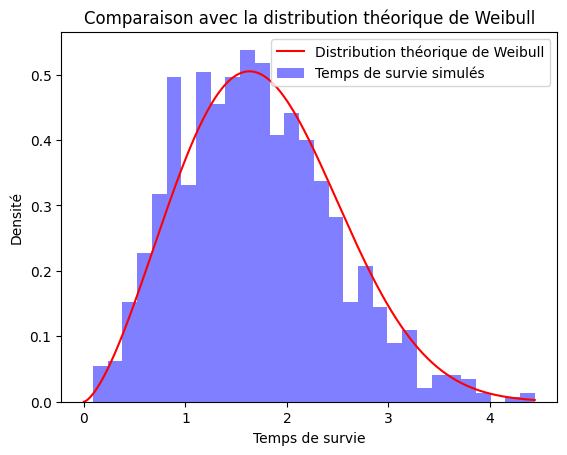

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, max(temps_survie), 1000)
y = weibull_min.pdf(x, k, scale=lamda)
plt.plot(x, y, color='red', label='Distribution théorique de Weibull')
plt.hist(temps_survie, bins=30, density=True, alpha=0.5, color='blue', label='Temps de survie simulés')
plt.xlabel('Temps de survie')
plt.ylabel('Densité')
plt.title('Comparaison avec la distribution théorique de Weibull')
plt.legend()
plt.show()

**-▶** La correspondance entre les données simulées et la distribution théorique de Weibull confirme que le modèle de simulation reproduit avec succès les caractéristiques de cette distribution. Cette concordance valide le processus de simulation et renforce la confiance dans sa capacité à générer des données conformes aux attentes



#5. Estimation des paramètres par maximum de vraisemblance

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import weibull_min

# Fonction de log-vraisemblance pour la distribution de Weibull
def log_vraisemblance_weibull(params, données):
    k, lamda = params
    if k <= 0 or lamda <= 0:
        return np.inf
    return -np.sum(weibull_min.logpdf(données, k, scale=lamda))

# Estimation des paramètres par maximum de vraisemblance
supposition_initiale = [2.5, 2]
résultat = minimize(log_vraisemblance_weibull, supposition_initiale, args=(temps_survie,), method='L-BFGS-B')
k_estimé, lamda_estimé = résultat.x

# Affichage des paramètres estimés
print("Estimation des paramètres par maximum de vraisemblance :")
print("Paramètre de forme (k) estimé :", k_estimé)
print("Paramètre d'échelle (lambda) estimé :", lamda_estimé)


Estimation des paramètres par maximum de vraisemblance :
Paramètre de forme (k) estimé : 2.3787960573443105
Paramètre d'échelle (lambda) estimé : 1.906898234826304


**-▶** Les paramètres estimés par maximum de vraisemblance sont très proches des valeurs choisies initialement. Cela confirme que les paramètres initiaux étaient bien ajustés pour représenter la distribution des temps de survie. En résumé, les résultats de l'estimation soutiennent la validité de l'approche de modélisation utilisée.







# 6. Comparaison des Courbes de Survie entre Paramètres Initiaux et Estimés:

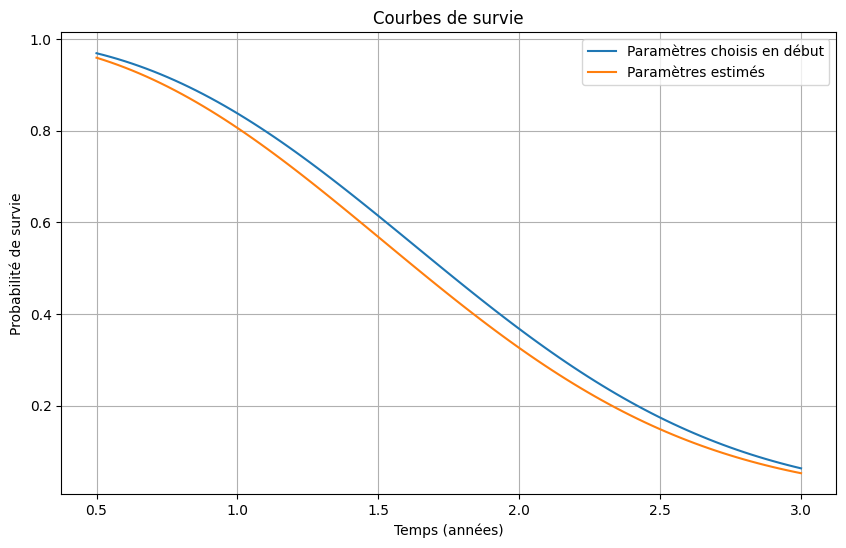

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def survival_function(x, k, lam):
    return np.exp(-(x/lam)**k)

# Paramètres de la fonction de survie
k = 2.5
lam = 2

# Paramètres estimés
k1 = k_estimé
lam1 = lamda_estimé

# Durées de suivi
x_values = np.linspace(0.5, 3, 100)

# Calculer les probabilités de survie pour chaque durée de suivi avec les paramètres choisis
prob_survival_choisi = survival_function(x_values, k, lam)

# Calculer les probabilités de survie pour chaque durée de suivi avec les paramètres estimés
prob_survival_estimé = survival_function(x_values, k_estimé, lamda_estimé)

# Tracer les Courbes de survie
plt.figure(figsize=(10, 6))
plt.plot(x_values, prob_survival_choisi, label='Paramètres choisis en début')
plt.plot(x_values, prob_survival_estimé, label='Paramètres estimés')
plt.title('Courbes de survie')
plt.xlabel('Temps (années)')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.grid(True)
plt.show()


# **Conclusion**

En résumé, notre projet de simulation de données de survie pour les bébés, suivis de l'âge de 6 mois à 3 ans, nous a permis d'évaluer les probabilités de survie et d'observer les événements survenus pendant cette période. Ces résultats offrent des informations cruciales pour comprendre les facteurs de risque et l'efficacité des traitements chez les bébés, facilitant ainsi une prise de décision médicale éclairée pour améliorer les soins de santé infantile.

# **La référence**

- Wikipedia. (s. d.). Weibull distribution. Récupéré sur [https://en.wikipedia.org/wiki/Weibull_distribution](https://en.wikipedia.org/wiki/Weibull_distribution)

- Kaggle. (s. d.). Demo: Weibull Distribution. Récupéré sur [https://www.kaggle.com/code/mclikmb4/demo-weibull-distribution](https://www.kaggle.com/code/mclikmb4/demo-weibull-distribution)

- Shukla, A. (s. d.). Parametric Models Weibull Curve Estimation. Récupéré sur [https://github.com/thisisashukla/survival-analysis/blob/master/3.%20Parametric%20Models%20Weibull%20Curve%20Estimation.ipynb](https://github.com/thisisashukla/survival-analysis/blob/master/3.%20Parametric%20Models%20Weibull%20Curve%20Estimation.ipynb)


- Stoffel, S. (s. d.). Survival Simulation Example. Récupéré sur [https://rpubs.com/SteadyStoffel/survival_sim_1](https://rpubs.com/SteadyStoffel/survival_sim_1)





